<a href="https://colab.research.google.com/github/jjindia/ML/blob/main/1_DecisionTreeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import linear_model, datasets, tree
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

# Linear regression
Now we will solve the Linear regression problem using a decision tree. A decision tree is a non-parametric machine learning model in contrast to linear/logistic regression which is a parametric model.


# Prepare data
First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data:
<br>
y = \frac{x}{2}+sin(x)+\epsilon
<br>
Where \epsilon \sim \mathcal{N}(0,1)
 is Gaussian noise.
 Ref: https://github.com/Santara/ML-MOOC-NPTEL/ 

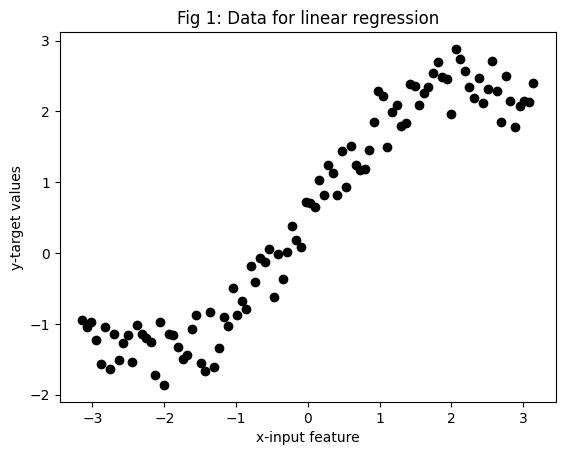

In [2]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

In [3]:
x

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [4]:
y

array([-0.95042172, -1.03999091, -0.97334877, -1.2343418 , -1.55976697,
       -1.03916382, -1.63004243, -1.14029499, -1.50489773, -1.26742894,
       -1.15302086, -1.54194482, -1.00952621, -1.13782726, -1.19222257,
       -1.25019101, -1.72818486, -0.96651063, -1.86166479, -1.14490469,
       -1.15056442, -1.33100521, -1.49073699, -1.44312377, -1.07555639,
       -0.87656944, -1.54996922, -1.66984655, -0.82701826, -1.60713802,
       -1.34560594, -0.90142254, -1.03586053, -0.49856788, -0.86911045,
       -0.6726806 , -0.78586891, -0.18189641, -0.40522616, -0.06763932,
       -0.13118283,  0.05855085, -0.62573162, -0.01992999, -0.36819719,
        0.01785149,  0.3856265 ,  0.17953241,  0.08773774,  0.71523821,
        0.71116181,  0.64792782,  1.0312917 ,  0.8130993 ,  1.245836  ,
        1.13383763,  0.81442787,  1.43786034,  0.93485084,  1.51496881,
        1.2445955 ,  1.16729773,  1.19050756,  1.45548707,  1.85161843,
        2.29263946,  2.21344238,  1.49755206,  1.99356982,  2.08

# Split the dataset into training, validation and test sets
It is always encouraged in machine learning to split the available data into training, validation and test sets. The training set is supposed to be used to train the model. The model is evaluated on the validation set after every episode of training. The performance on the validation set gives a measure of how good the model generalizes. Various hyperparameters of the model are tuned to improve performance on the validation set. Finally when the model is completely optimized and ready for deployment, it is evaluated on the test data and the performance is reported in the final description of the model.

In this example we do a 
 random split of the data between the training, validation and test sets respectively.

In [5]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

# Fit a line to the data

Linear regression learns to fit a hyperplane to our data in the feature space. For one dimensional data, the hyperplane reduces to a straight line. A decision tree learns a piece-wise linear fit to the data. We will use sklearn.tree.DecisionTreeRegressor.

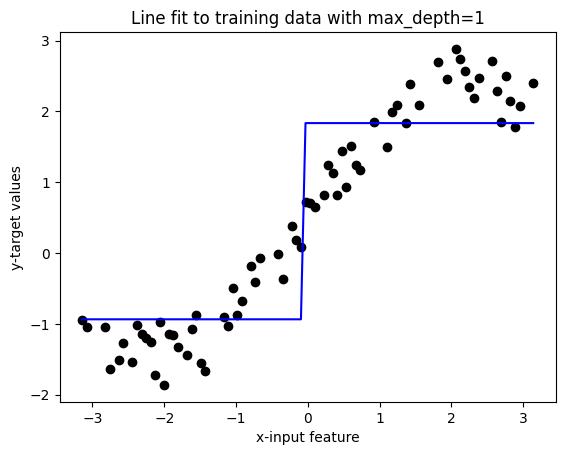

Training MSE:  0.38716959413343616 
Validation MSE:  0.24889116999601713 
Test MSE:  0.276828042285849


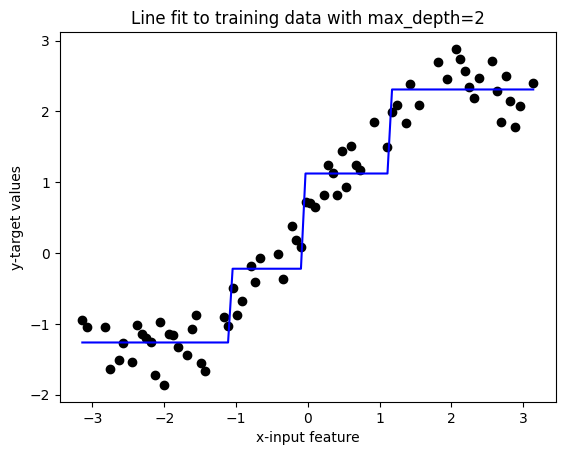

Training MSE:  0.10132033602469698 
Validation MSE:  0.13295970238859464 
Test MSE:  0.1636892290051891


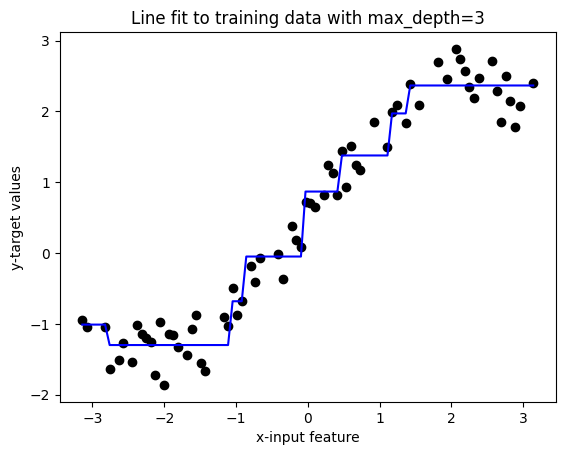

Training MSE:  0.06707026202211679 
Validation MSE:  0.13392279461295303 
Test MSE:  0.11143874100488077


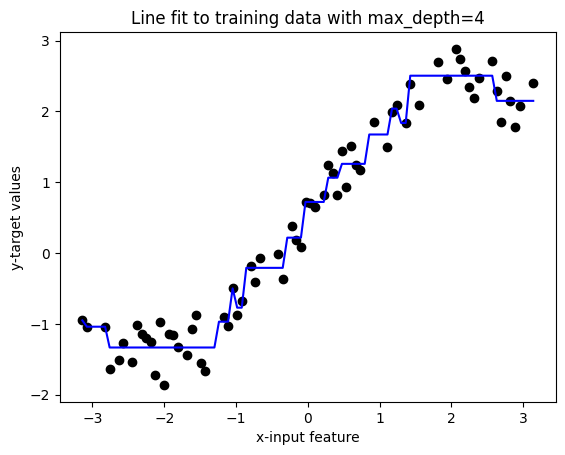

Training MSE:  0.043496829040917215 
Validation MSE:  0.11080868975172743 
Test MSE:  0.08374230424804732


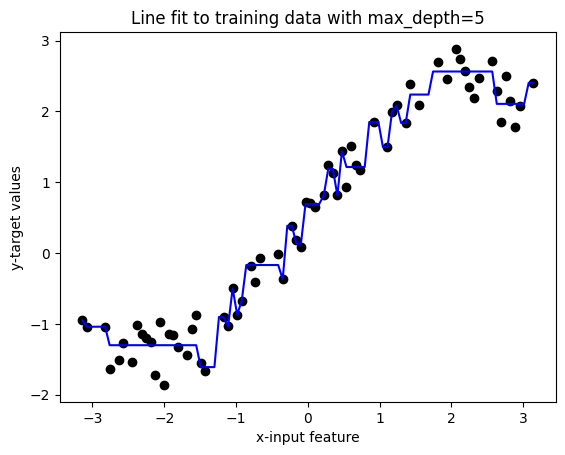

Training MSE:  0.03300570681900256 
Validation MSE:  0.16857952609276827 
Test MSE:  0.07798746792921583


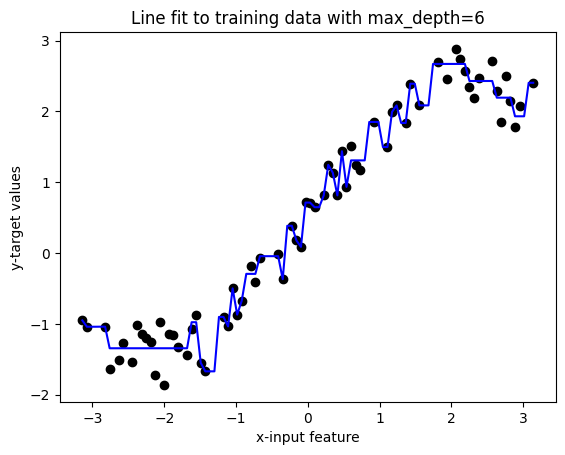

Training MSE:  0.023081180146626572 
Validation MSE:  0.1855891273642784 
Test MSE:  0.07926491428454983


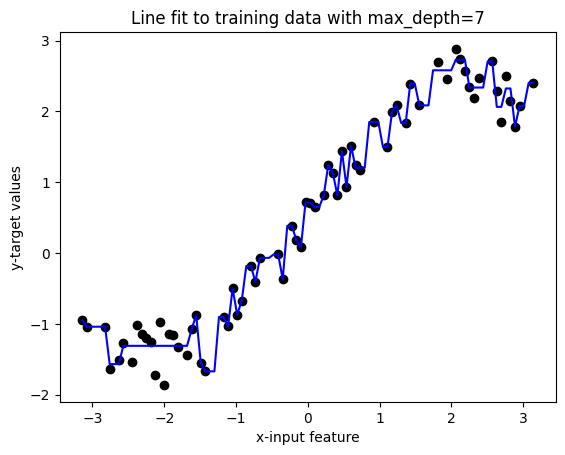

Training MSE:  0.01643264380547807 
Validation MSE:  0.18409903538751315 
Test MSE:  0.09176079853451394


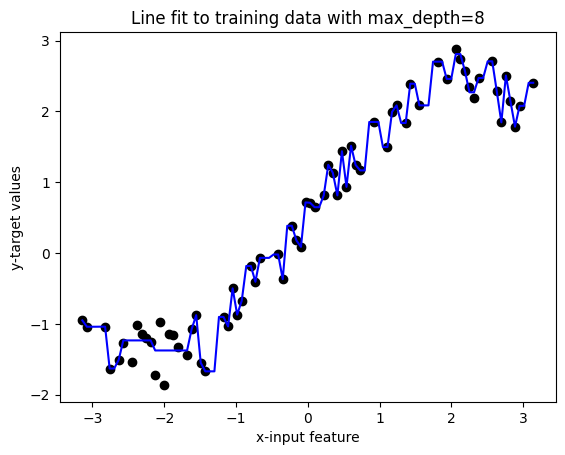

Training MSE:  0.011679899410469067 
Validation MSE:  0.1804628070981674 
Test MSE:  0.09683617667946448


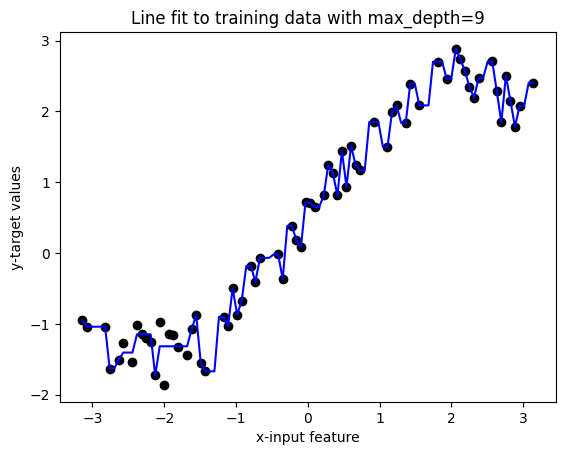

Training MSE:  0.008032512235712639 
Validation MSE:  0.18160056878189032 
Test MSE:  0.10063008831891303


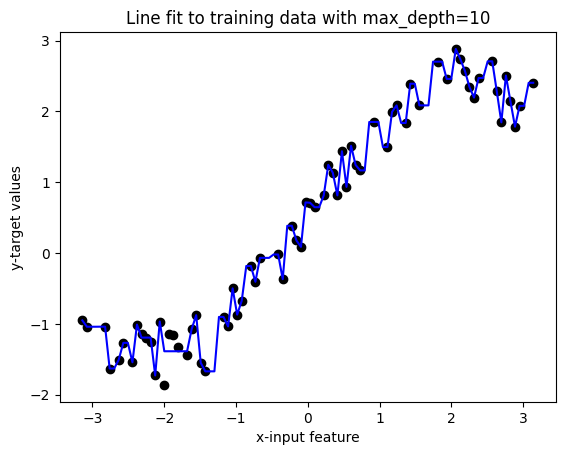

Training MSE:  0.005034514594793407 
Validation MSE:  0.18029971471856865 
Test MSE:  0.0972803164681285


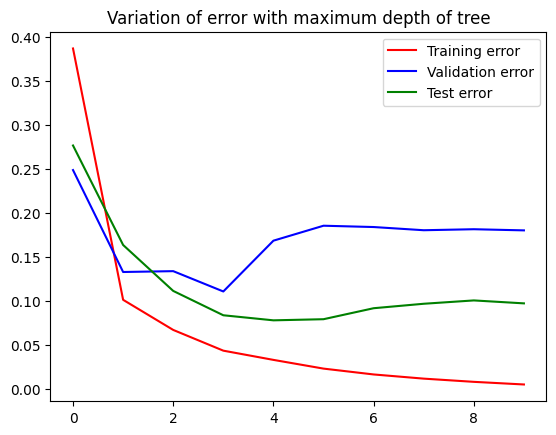

In [8]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as arrays. Hence we reshpae the arrays into column array
    x_train_for_line_fitting = np.array(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.array(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print( 'Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

# Check the details of the model

In [12]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [13]:
print("Test 1:",model.predict(np.array([[0]])) )
print("Test 2:",model.predict(np.array([[1]])) )

Test 1: [0.71523821]
Test 2: [1.85161843]


Notice how the generalization performance of the model can be controlled via the depth of a decision tree. The training error decreases steadily with increasing depth as the model fits the data more and more closely. The generalization errors given by the validation and test errors also decrease till a depth of 3 as the bias in the model reduces. However, as we increase the depth beyond 3, the model starts overfitting the data (huggs onto noise in the data) and validation and test errors increase. Thus the ability of the model to generalize deteriorates as overfitting sets in.